In [16]:
import pandas as pd
import os

# Directory path for CSV files
csv_data_directory = '../csvdata'  # Adjust the path relative to the src directory

# List to hold DataFrames
dataframes = []

# Iterate over each CSV file in the directory
for filename in os.listdir(csv_data_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_data_directory, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


In [2]:
combined_df.columns

Index(['url', 'pgn', 'time_control', 'end_time', 'rated', 'tcn', 'uuid',
       'initial_setup', 'fen', 'time_class', 'rules', 'white.rating',
       'white.result', 'white.@id', 'white.username', 'white.uuid',
       'black.rating', 'black.result', 'black.@id', 'black.username',
       'black.uuid', 'accuracies.white', 'accuracies.black', 'start_time'],
      dtype='object')

## Game Outcomes for znatahn as White

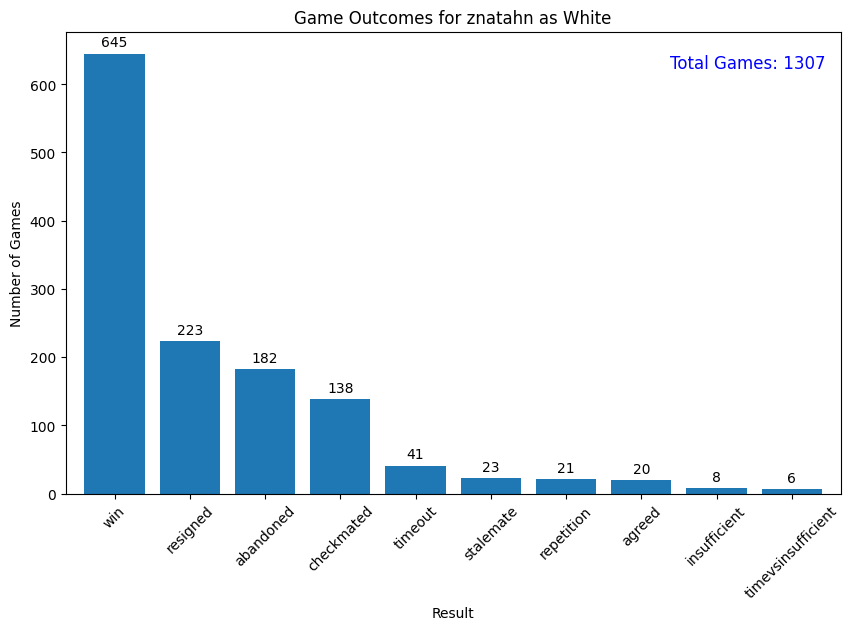

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame containing all the chess game data

# Filter for games where you played as white
znatahn_as_white = combined_df[combined_df['white.username'] == 'znatahn']

# Analyze the results
results = znatahn_as_white['white.result'].value_counts()

plt.figure(figsize=(10, 6))  # Increase figure size
bars = results.plot(kind='bar', width=0.8)  # Adjust bar width if needed
plt.title('Game Outcomes for znatahn as White')
plt.xlabel('Result')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)  # Rotate labels to 45 degrees

# Adding annotations to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, 
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Adding total games info in blue, positioned at the top right corner
total_games = znatahn_as_white.shape[0]
plt.text(0.98, 0.95, f'Total Games: {total_games}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', horizontalalignment='right', color='blue')

plt.show()


# Game Outcomes for znatahn as Black

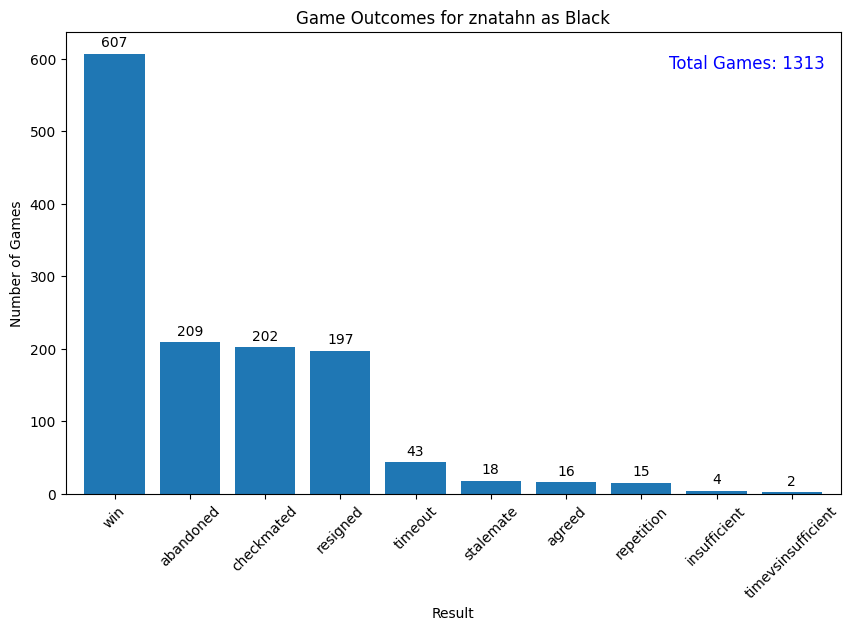

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame containing all the chess game data

# Filter for games where you played as black
znatahn_as_black = combined_df[combined_df['black.username'] == 'znatahn']

# Analyze the results
results = znatahn_as_black['black.result'].value_counts()

plt.figure(figsize=(10, 6))  # Increase figure size
bars = results.plot(kind='bar', width=0.8)  # Adjust bar width if needed
plt.title('Game Outcomes for znatahn as Black')
plt.xlabel('Result')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)  # Rotate labels to 45 degrees

# Adding annotations to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, 
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Adding total games info in blue, positioned at the top right corner
total_games = znatahn_as_black.shape[0]
plt.text(0.98, 0.95, f'Total Games: {total_games}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', horizontalalignment='right', color='blue')

plt.show()


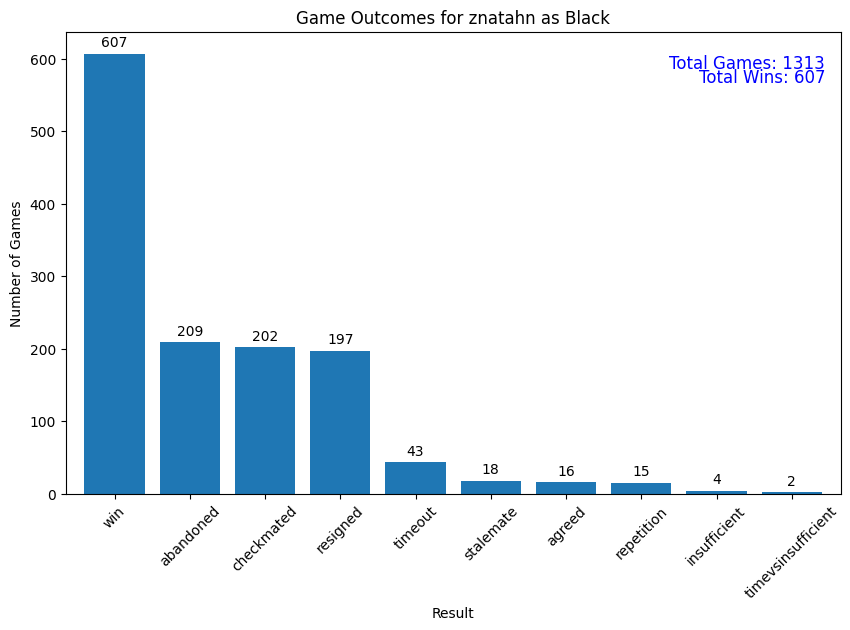

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame containing all the chess game data

# Filter for games where you played as black
znatahn_as_black = combined_df[combined_df['black.username'] == 'znatahn']

# Analyze the results
results = znatahn_as_black['black.result'].value_counts()

plt.figure(figsize=(10, 6))  # Increase figure size
bars = results.plot(kind='bar', width=0.8)  # Adjust bar width if needed
plt.title('Game Outcomes for znatahn as Black')
plt.xlabel('Result')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)  # Rotate labels to 45 degrees

# Adding annotations to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, 
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Adding total games info in blue, positioned at the top right corner
total_games = znatahn_as_black.shape[0]
total_wins = znatahn_as_black[znatahn_as_black['black.result'] == 'win'].shape[0]

plt.text(0.98, 0.95, f'Total Games: {total_games}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', horizontalalignment='right', color='blue')
plt.text(0.98, 0.92, f'Total Wins: {total_wins}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', horizontalalignment='right', color='blue')

plt.show()


In [27]:
import pandas as pd

# Assuming combined_df is your DataFrame containing all the chess game data

# Function to get opponent's ID based on your username and color
def get_opponents_id(row):
    if row['white.username'] == 'znatahn':
        return row['black.@id']
    else:
        return row['white.@id']

# Add a new column for opponent's ID
combined_df['opponents_id'] = combined_df.apply(get_opponents_id, axis=1)

# Filter for games where znatahn won
znatahn_wins = combined_df[(combined_df['white.username'] == 'znatahn') & (combined_df['white.result'] == 'win') |
                           (combined_df['black.username'] == 'znatahn') & (combined_df['black.result'] == 'win')]

# Count wins against each opponent
win_counts = znatahn_wins['opponents_id'].value_counts()

# Display the win counts
print(len(win_counts))


1240


In [30]:
import requests
import time

# Function to fetch country name from player's URL
def get_country_from_player_url(player_url):
    print(f"Fetching data for player: {player_url}")

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    time.sleep(1)  # Sleep for 1 second between requests
    response = requests.get(player_url, headers=headers)
    if response.status_code == 200:
        player_data = response.json()
        country_url = player_data.get('country')

        time.sleep(1)  # Another sleep before the next request
        country_response = requests.get(country_url, headers=headers)
        if country_response.status_code == 200:
            country_data = country_response.json()
            country_name = country_data.get('name')
            print(f"Fetched country: {country_name}")
            return country_name
    else:
        print(f"Failed to fetch data for player: {player_url}, status code: {response.status_code}")
    return None

# Dictionary to count wins per country
country_wins = {}

for opponent_url, win_count in win_counts.items():
    country_name = get_country_from_player_url(opponent_url)
    if country_name:
        country_wins[country_name] = country_wins.get(country_name, 0) + win_count

# Display the win counts per country
for country, wins in country_wins.items():
    print(f"{country}: {wins} wins")


Fetching data for player: https://api.chess.com/pub/player/bezzou1
Fetched country: Qatar
Fetching data for player: https://api.chess.com/pub/player/sitarasp
Fetched country: Australia
Fetching data for player: https://api.chess.com/pub/player/leonadferro
Fetched country: India
Fetching data for player: https://api.chess.com/pub/player/jeansynthiapark
Fetched country: United States
Fetching data for player: https://api.chess.com/pub/player/boska1234
Fetched country: Serbia
Fetching data for player: https://api.chess.com/pub/player/thickasscrack
Fetched country: Canada
Fetching data for player: https://api.chess.com/pub/player/mmmmrrrr1
Fetched country: Saudi Arabia
Fetching data for player: https://api.chess.com/pub/player/trisha134647
Fetched country: United States
Fetching data for player: https://api.chess.com/pub/player/xtheking1995x
Fetched country: Argentina
Fetching data for player: https://api.chess.com/pub/player/silsey
Fetched country: Belgium
Fetching data for player: https:

In [31]:
country_wins

{'Qatar': 4,
 'Australia': 26,
 'India': 132,
 'United States': 311,
 'Serbia': 6,
 'Canada': 56,
 'Saudi Arabia': 21,
 'Argentina': 10,
 'Belgium': 6,
 'Philippines': 35,
 'Brazil': 49,
 'South Korea': 11,
 'Russia': 33,
 'Bolivia': 3,
 'Nigeria': 3,
 'Egypt': 22,
 'Indonesia': 19,
 'Poland': 11,
 'Italy': 23,
 'Zimbabwe': 1,
 'France': 25,
 'Puerto Rico': 3,
 'Türkiye': 21,
 'Chile': 5,
 'Thailand': 3,
 'Uzbekistan': 6,
 'Taiwan': 2,
 'Iran': 8,
 'Slovenia': 3,
 'Syria': 4,
 'Slovakia': 1,
 'Israel': 7,
 'Cambodia': 2,
 'United Kingdom': 55,
 'Algeria': 5,
 'South Africa': 4,
 'Bosnia-Herzegovina': 1,
 'Ethiopia': 1,
 'Mexico': 25,
 'Sweden': 10,
 'International': 6,
 'Finland': 2,
 'Netherlands': 16,
 'Germany': 30,
 'Vietnam': 7,
 'Togo': 1,
 'Austria': 3,
 'Palestine': 3,
 'Ukraine': 10,
 'Colombia': 9,
 'Greece': 5,
 'Uruguay': 2,
 'Switzerland': 4,
 'Croatia': 2,
 'Dominican Republic': 3,
 'Sri Lanka': 2,
 'Kazakhstan': 9,
 'Ecuador': 2,
 'Spain': 14,
 'Iraq': 5,
 'Nepal': 6,
 '

In [32]:
# Convert to DataFrame
df_country_wins = pd.DataFrame(country_wins.items(), columns=['Country', 'Wins'])

# Sort the DataFrame in descending order
df_sorted = df_country_wins.sort_values(by='Wins', ascending=False)

# Save the DataFrame to a CSV file
csv_file_path = '../csvdata/country_wins_sorted.csv'
df_sorted.to_csv(csv_file_path, index=False)

csv_file_path

'../csvdata/country_wins_sorted.csv'

ValueError: Could not save to JPEG for display

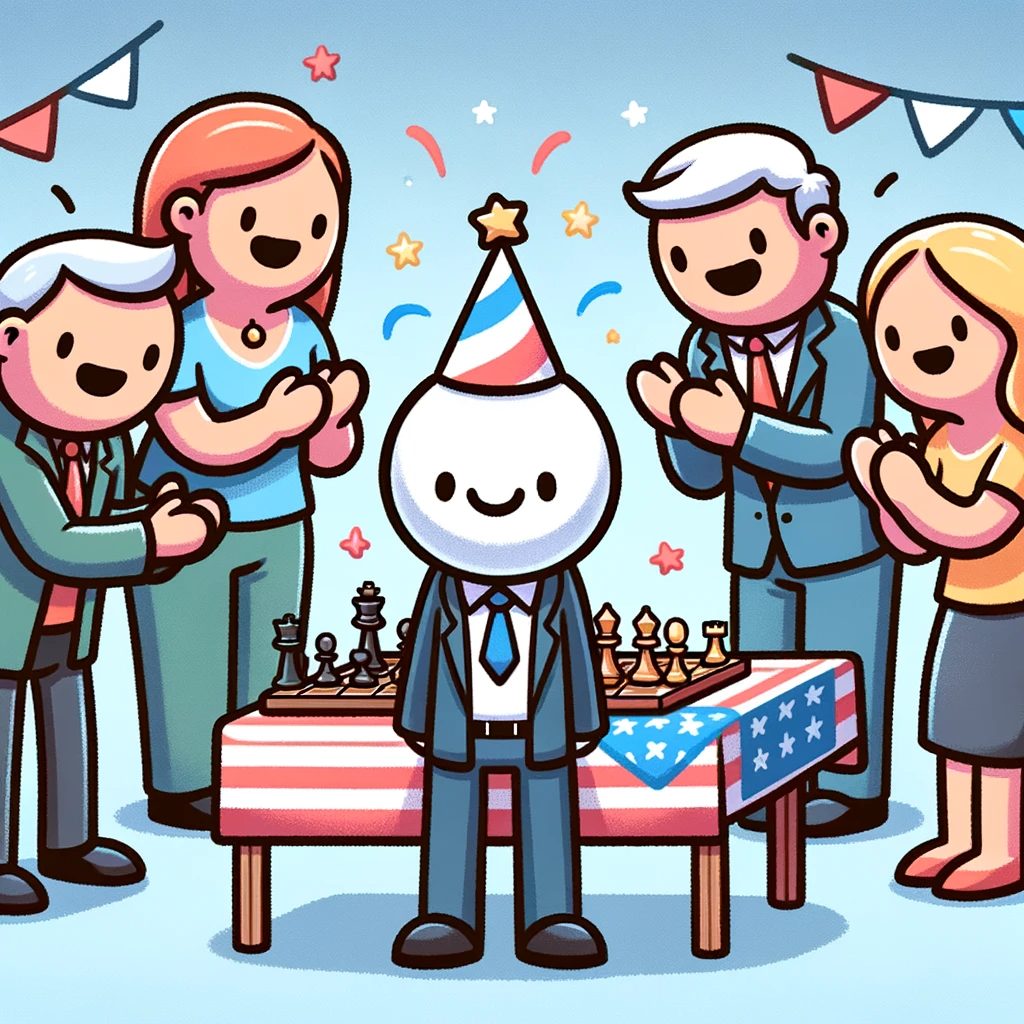

In [34]:
from PIL import Image
from IPython.display import display

# Path to your image
image_path = '../img/success.png'  # Replace with your image file path

# Open the image
img = Image.open(image_path)

# Display the image in the notebook
display(img)